
train_df = pd.read_csv('../data/train.csv')

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('../data/train.csv')


Right now our dataset has 17 columns but we are not interested in all of them. So we are going to drop some columns: weather, wind, weathter_detail, and stadium. 
We all think that these four columns won't help us predict the points scored and might just creaete some troubles if we have missing values.

In [ ]:
print("Dataset shape:", train_df.shape)
print("\nData types:")
print(train_df.dtypes)
print("\nDataset info:")
train_df.info()


Dataset shape: (4548, 17)

Data types:
schedule_date           object
schedule_season          int64
schedule_week           object
schedule_playoff          bool
team_home               object
score_home             float64
score_away             float64
team_away               object
team_favorite_id        object
spread_favorite        float64
over_under_line        float64
stadium                 object
stadium_neutral           bool
weather_temperature    float64
weather_wind_mph       float64
weather_humidity       float64
weather_detail          object
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        4548 non-null   object 
 1   schedule_season      4548 non-null   int64  
 2   schedule_week        4548 non-null   object 
 3   schedule_playoff     4548 non-null   bool  

In [ ]:
train_df.describe()


,schedule_season,score_home,score_away,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,weather_humidity
count,4548.000000,4448.000000,4448.000000,4448.000000,4448.000000,3567.000000,3565.000000,1487.000000
mean,2015.048153,23.440198,21.250000,-5.385567,44.255621,62.148584,5.150912,62.637525
std,6.096873,10.242990,9.986048,3.493215,4.687211,15.436855,5.251605,16.585267
min,2005.000000,0.000000,0.000000,-26.500000,30.500000,-6.000000,0.000000,4.000000
25%,2010.000000,17.000000,14.000000,-7.000000,41.000000,52.000000,0.000000,52.000000
50%,2015.000000,23.000000,21.000000,-4.000000,44.000000,70.000000,5.000000,64.000000
75%,2020.000000,30.000000,28.000000,-3.000000,47.500000,72.000000,8.000000,74.000000
max,2025.000000,70.000000,59.000000,0.000000,68.000000,97.000000,40.000000,100.000000


In [7]:
print("Missing values per column:")
print(train_df.isnull().sum())
print("\nPercentage of missing values:")
print(train_df.isnull().mean() * 100)


Missing values per column:
schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home              100
score_away              100
team_away                 0
team_favorite_id        100
spread_favorite         100
over_under_line         100
stadium                   0
stadium_neutral           0
weather_temperature     981
weather_wind_mph        983
weather_humidity       3061
weather_detail         3183
dtype: int64

Percentage of missing values:
schedule_date           0.000000
schedule_season         0.000000
schedule_week           0.000000
schedule_playoff        0.000000
team_home               0.000000
score_home              2.198769
score_away              2.198769
team_away               0.000000
team_favorite_id        2.198769
spread_favorite         2.198769
over_under_line         2.198769
stadium                 0.000000
stadium_neutral         0.000000
weather_temperature    2

In [9]:
numeric_cols = ['score_home', 'score_away', 'spread_favorite', 'over_under_line']
print("Summary statistics for numeric columns:")
train_df[numeric_cols].describe()


Summary statistics for numeric columns:


,score_home,score_away,spread_favorite,over_under_line
count,4448.000000,4448.000000,4448.000000,4448.000000
mean,23.440198,21.250000,-5.385567,44.255621
std,10.242990,9.986048,3.493215,4.687211
min,0.000000,0.000000,-26.500000,30.500000
25%,17.000000,14.000000,-7.000000,41.000000
50%,23.000000,21.000000,-4.000000,44.000000
75%,30.000000,28.000000,-3.000000,47.500000
max,70.000000,59.000000,0.000000,68.000000


In [10]:
correlation_matrix = train_df.select_dtypes(include=[np.number]).corr()
correlation_matrix


,schedule_season,score_home,score_away,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,weather_humidity
schedule_season,1.000000,0.048222,0.063625,0.048622,0.263025,0.166688,-0.287771,-0.071098
score_home,0.048222,1.000000,-0.054793,-0.132383,0.199360,-0.009849,-0.082205,-0.030790
score_away,0.063625,-0.054793,1.000000,0.135842,0.229368,0.083388,-0.130404,-0.044532
spread_favorite,0.048622,-0.132383,0.135842,1.000000,-0.016565,0.117891,-0.055667,-0.002734
over_under_line,0.263025,0.199360,0.229368,-0.016565,1.000000,0.156083,-0.259679,-0.148635
weather_temperature,0.166688,-0.009849,0.083388,0.117891,0.156083,1.000000,-0.381122,-0.136219
weather_wind_mph,-0.287771,-0.082205,-0.130404,-0.055667,-0.259679,-0.381122,1.000000,0.102080
weather_humidity,-0.071098,-0.030790,-0.044532,-0.002734,-0.148635,-0.136219,0.102080,1.000000


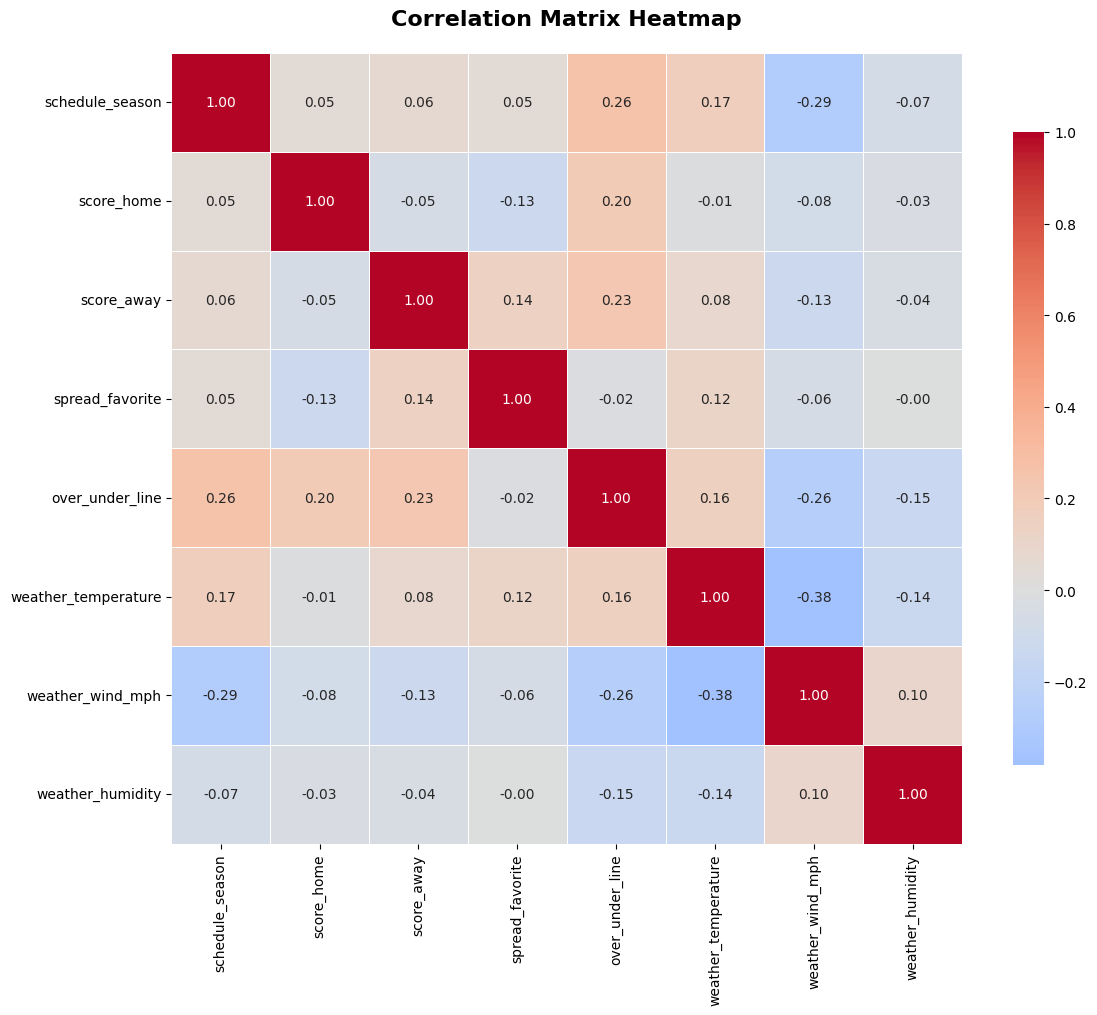

In [ ]:
# Create correlation matrix
correlation_matrix = train_df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  
            fmt='.2f',   
            cmap='coolwarm',  
            center=0,    
            square=True,
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8}) 
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [11]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
print("Skewness (measure of asymmetry):")
print(train_df[numeric_cols].skew())
print("\nKurtosis (measure of tail heaviness):")
print(train_df[numeric_cols].kurtosis())


Skewness (measure of asymmetry):
schedule_season       -0.017953
score_home             0.274384
score_away             0.279703
spread_favorite       -1.207279
over_under_line        0.183263
weather_temperature   -0.965366
weather_wind_mph       0.972770
weather_humidity      -0.341057
dtype: float64

Kurtosis (measure of tail heaviness):
schedule_season       -1.234049
score_home             0.048094
score_away            -0.117737
spread_favorite        1.584508
over_under_line        0.122842
weather_temperature    0.450456
weather_wind_mph       1.063407
weather_humidity      -0.033204
dtype: float64
